# **AIN 214 - PA4 - FALL 2024**




**Student Number** :2220765053

**Name Surname**   :Muhammed EKİNCİ


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 13.12.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **Building kNN and Logistic Regression Classifiers**

---
**Dataset Path:** "Data/stroke.csv"
---

We will deal with the stroke dataset. The dataset contains demographic and health-related data to predict whether a patient is likely to have a stroke.

**Features:**


* id: Unique identifier (can be ignored for modeling).
* gender: Gender of the patient (categorical).
* age: Age of the patient (numerical).
* hypertension: Whether the patient has hypertension (0 = No, 1 = Yes).
* heart_disease: Whether the patient has heart disease (0 = No, 1 = Yes).
* ever_married: Marital status (categorical).
* work_type: Type of work (categorical).
* Residence_type: Rural or Urban (categorical).
* avg_glucose_level: Average glucose level (numerical).
* bmi: Body Mass Index (numerical).
* smoking_status: Smoking habits (categorical).
* stroke: Target variable (1 = Stroke, 0 = No Stroke).

# **Necessary Imports**

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# **PART- 1: Data Preprocessing and Visualization (35 Pts)**

---

## 1.1. Explaratory Data Analysis (20 Pts)

* Load the dataset
* Check and Handle Missing Values

  * Identify columns with missing values.
  * Replace missing values using suitable methods (mean or median imputation).

* Check and Handle Outliers

  * Detect outliers in numerical features
  * Handle outliers appropriately

* Convert categorical variables into numerical values.
* Perform data normalization



In [2]:
# your code here
data=pd.read_csv("Data/stroke.csv")
print(data.isna().sum()) #BMİ HAS 201  EMPTY VALUE.
data["bmi"].fillna(data["bmi"].mean(),inplace=True)#replace missing value with mean.




id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [3]:
numerical_features = data.drop(columns=["stroke"]).select_dtypes(include=[np.number])
# Determine and process limits by calculating IQR
for column in numerical_features.columns:
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  # IQR
    

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
  # Equating outliers with boundaries (Capping)
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

print("After outliers are handled:")
data.describe()


After outliers are handled:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.0,5110.0,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.0,0.0,100.996204,28.721613,0.048728
std,21161.721625,22.612647,0.0,0.0,33.214738,7.119940,0.215320
min,67.000000,0.080000,0.0,0.0,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.0,0.0,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.0,0.0,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.0,0.0,114.090000,32.800000,0.000000
max,72940.000000,82.000000,0.0,0.0,169.357500,46.300000,1.000000


In [4]:



data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked': 1, 'never smoked': 2, 'smokes': 3, 'Unknown': 0})
# One-Hot Encoding (for multi-category variables)
data = pd.get_dummies(data, columns=['work_type', 'Residence_type'], drop_first=True)



In [5]:
# Min-Max Normalization (For numeric columns)

scaler = MinMaxScaler()
# Normalize numeric data

normalized_data = scaler.fit_transform(data[numerical_features.columns])


normalized_data_df = pd.DataFrame(normalized_data, columns=numerical_features.columns)

# Merge normalized data with original data
data[numerical_features.columns] = normalized_data_df

print("After Data Normalization:")
data.describe()




After Data Normalization:


,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5109.000000,5110.000000,5110.0,5110.0,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.500197,0.413975,0.526692,0.0,0.0,0.656164,0.401586,0.511711,1.376908,0.048728
std,0.290392,0.492592,0.276033,0.0,0.0,0.475034,0.290752,0.197776,1.071534,0.215320
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242535,0.000000,0.304199,0.0,0.0,0.000000,0.193675,0.375000,0.000000,0.000000
50%,0.505880,0.000000,0.548340,0.0,0.0,1.000000,0.321830,0.502778,2.000000,0.000000
75%,0.749455,1.000000,0.743652,0.0,0.0,1.000000,0.516205,0.625000,2.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,3.000000,1.000000


## 1.2. Data Visualization (10 Pts)

* Visualize the distribution of numerical features
* Analyze the relationship between categorical features (e.g., gender, work_type) and the target variable (stroke).
* Plot a correlation heatmap to analyze their relationships.
* Comment on any findings

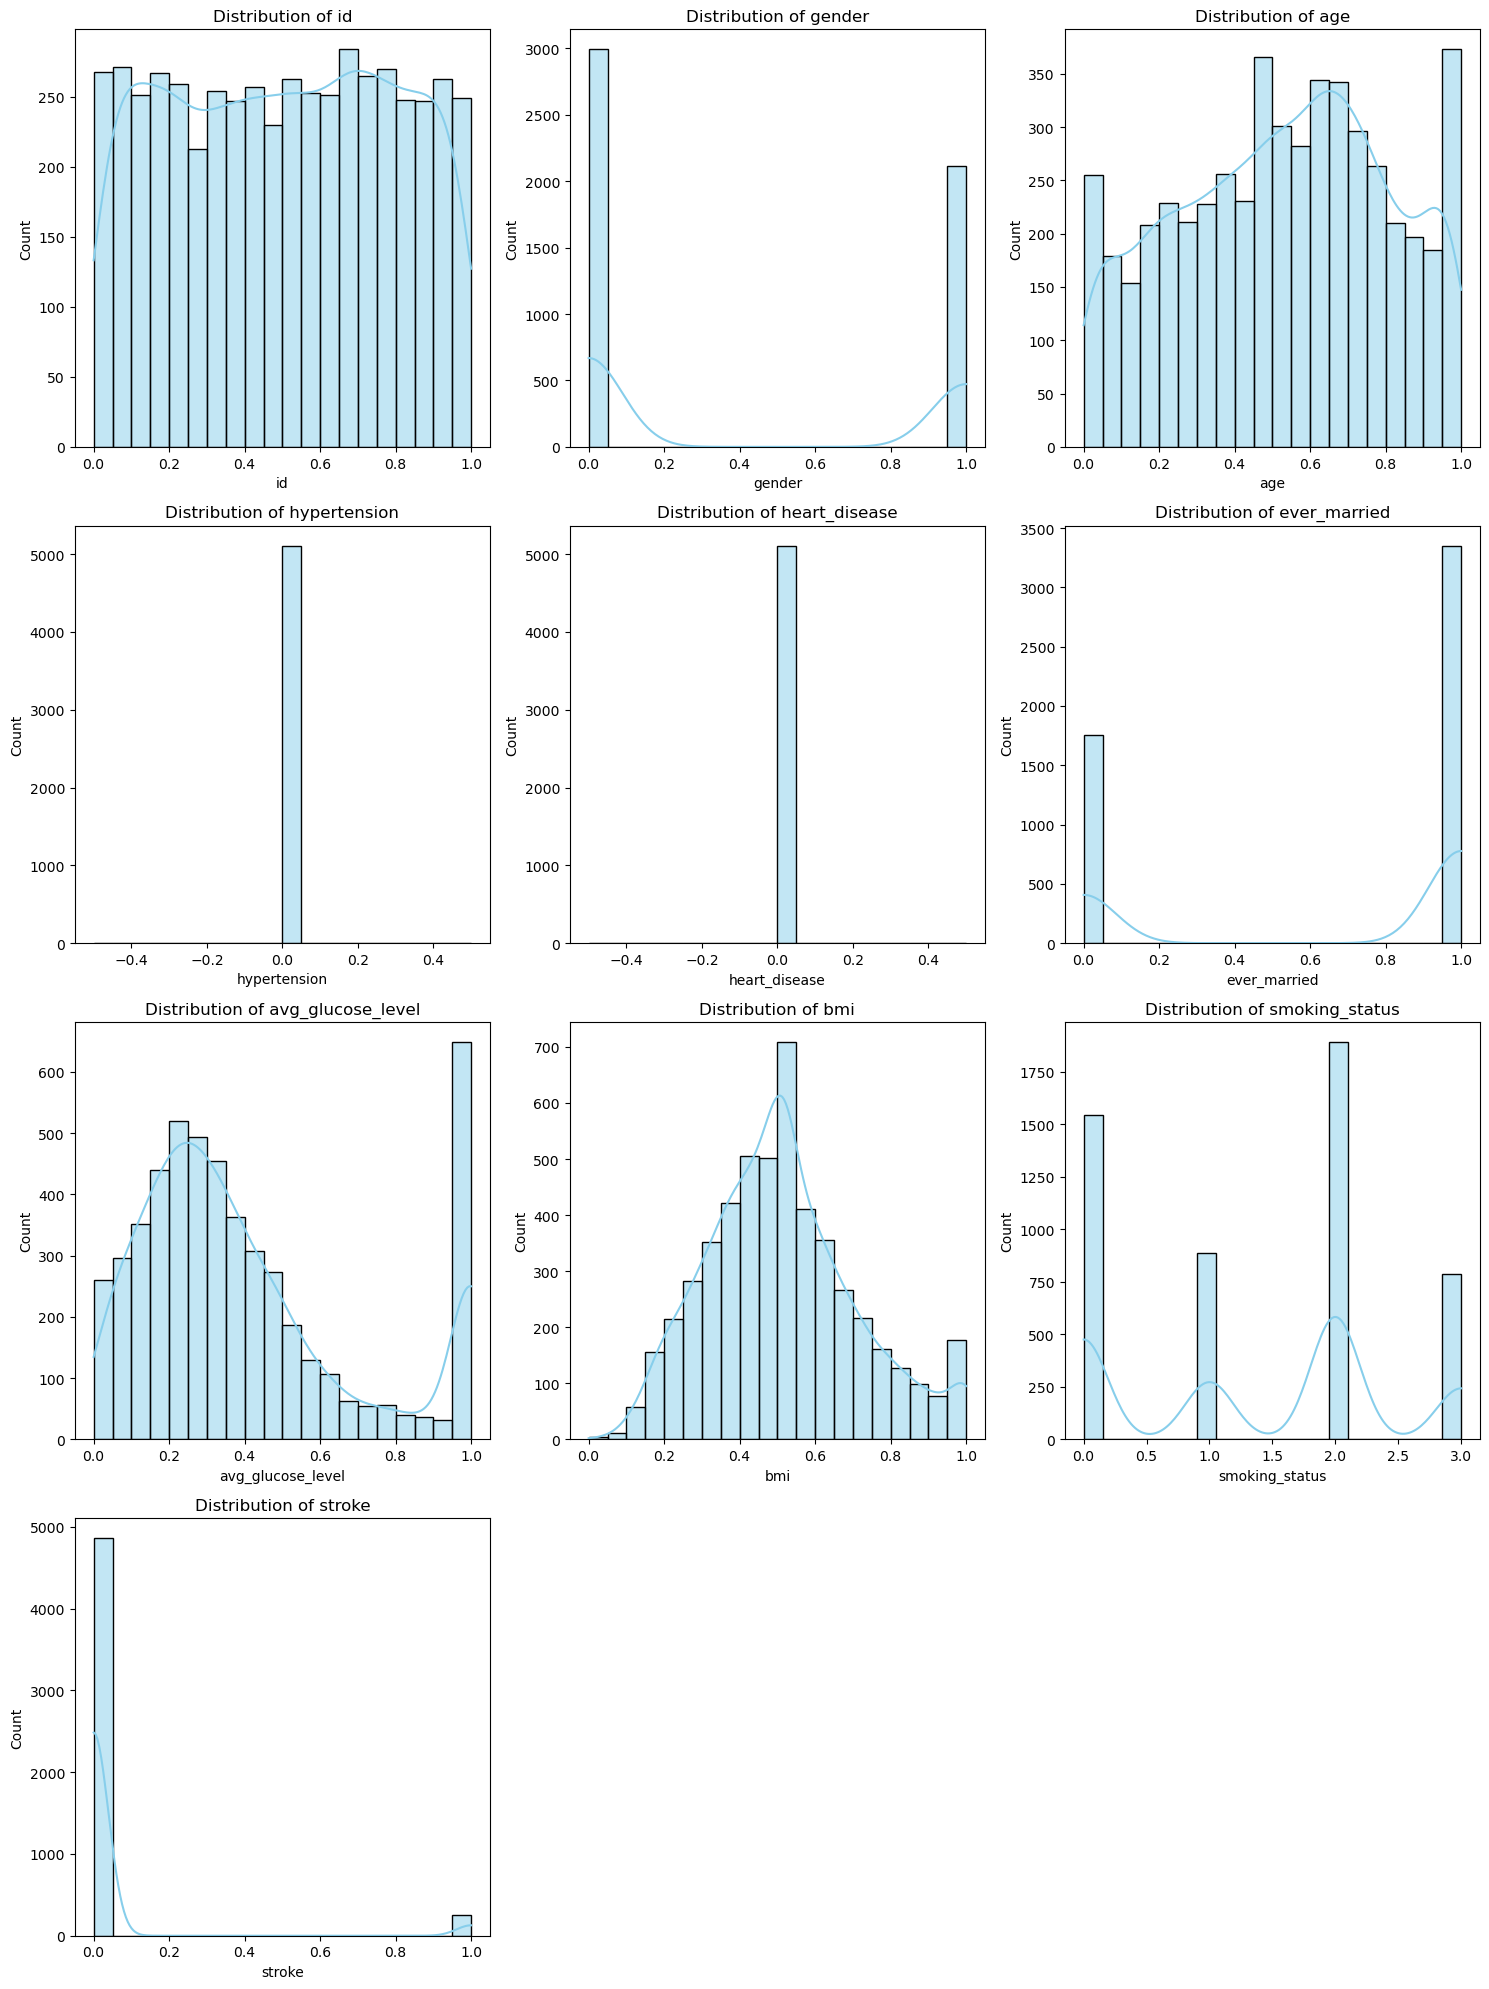

In [6]:
# Selecting numeric columns
numerical_features = data.select_dtypes(include=[np.number])


num_columns = 3  # there will be 3 graphics in each line
num_rows = int(np.ceil(len(numerical_features.columns) / num_columns))  # toplam sütun sayısına göre satır sayısını hesaplama

# Let's visualize all numerical columns with subplot
plt.figure(figsize=(num_columns * 5, num_rows * 5))
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(num_rows, num_columns, i)  
    sns.histplot(data[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


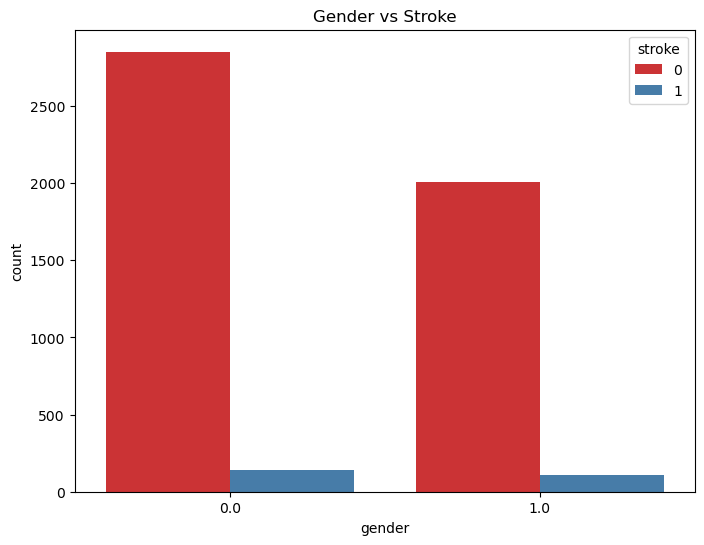

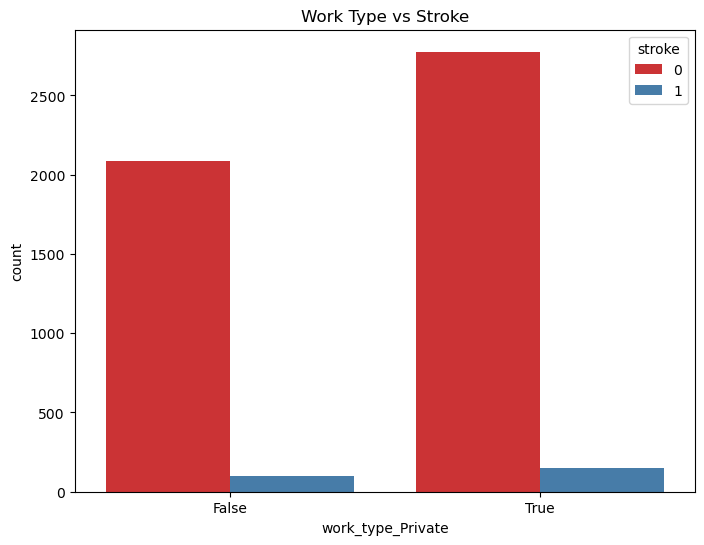

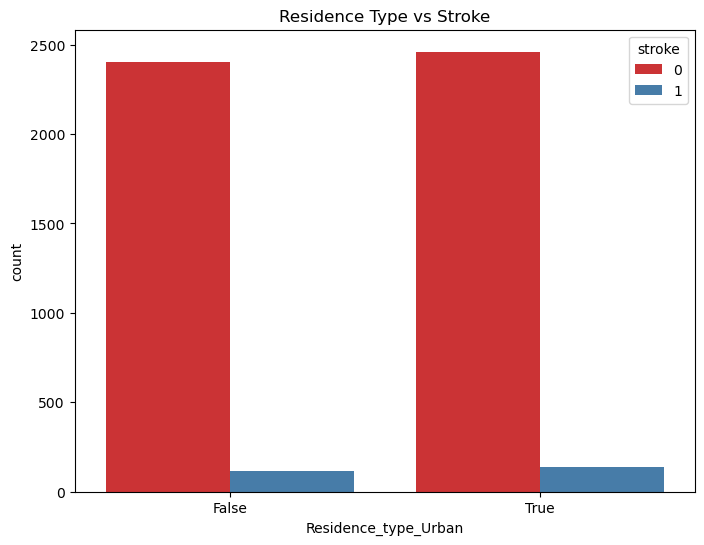

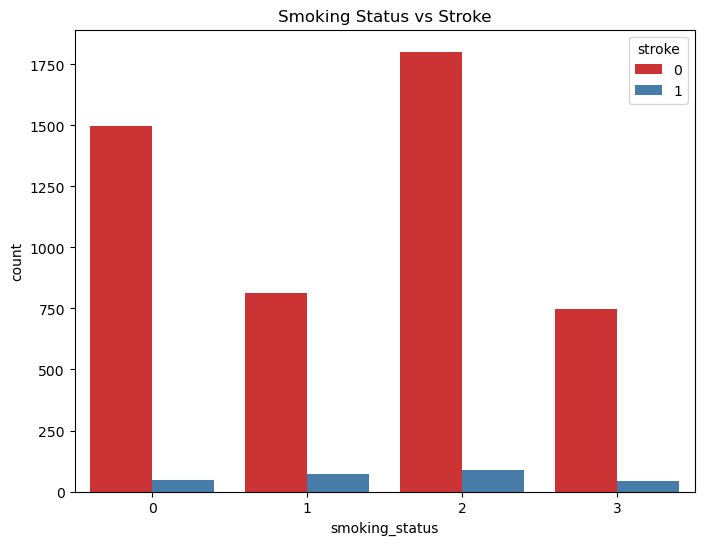

In [7]:
# show the relationship between 'gender' and 'stroke' with a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='stroke', data=data, palette='Set1')
plt.title('Gender vs Stroke')
plt.show()

# Showing the relationship between 'work_type' and 'stroke' with a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='work_type_Private', hue='stroke', data=data, palette='Set1')
plt.title('Work Type vs Stroke')
plt.show()

# Showing the relationship between 'Residence_type' and 'stroke' with a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Residence_type_Urban', hue='stroke', data=data, palette='Set1')
plt.title('Residence Type vs Stroke')
plt.show()

# Showing the relationship between 'smoking_status' and 'stroke' with a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_status', hue='stroke', data=data, palette='Set1')
plt.title('Smoking Status vs Stroke')
plt.show()


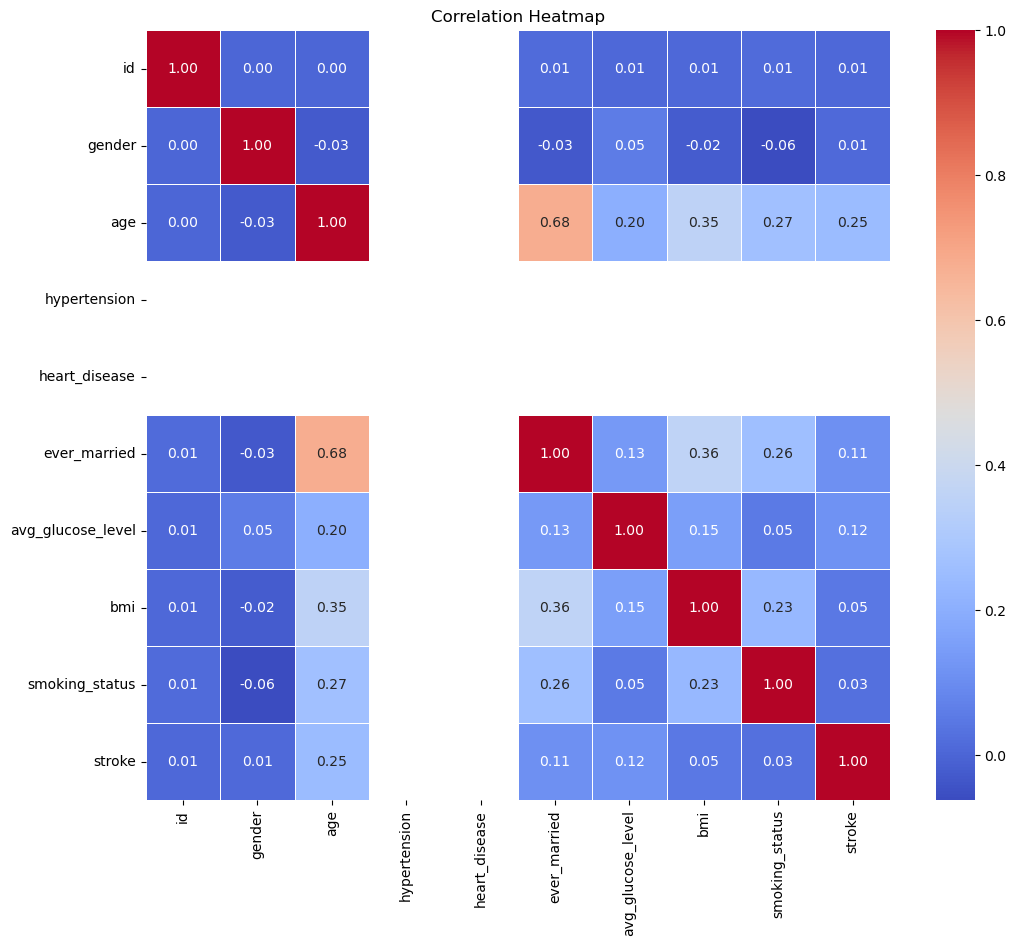

In [8]:
# Calculate correlation between numerical data
correlation_matrix = data[numerical_features.columns].corr()

# Creating the correlation heat map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



## 1.3. Data Splitting (5 Pts)

* Manually split the dataset into training (70%) and testing (30%) sets
* Shuffle and split the data
* Avoid using predefined functions like train_test_split for this task


In [9]:
import random
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Clear data (remove null values)
data = data.dropna()

# Let's check the values ​​of the stroke column (to see if we see 1's)

data_list = data.values.tolist()

# Shuffle data with random module
random.shuffle(data_list)

# Convert the shuffled list back to DataFrame
data = pd.DataFrame(data_list, columns=data.columns)

# To separate training and testing sets
train_size = int(0.7 * len(data))  
test_size = len(data) - train_size  

# Creating training and testing data
train_data = data[:train_size]  
test_data = data[train_size:]   

#1. Separating features (X) and labels (y)
X_train = train_data.drop(columns=['stroke', 'id'])  
y_train = train_data['stroke']

X_test = test_data.drop(columns=['stroke', 'id'])
y_test = test_data['stroke']

# oversampling with SMOTE
smote = SMOTE(random_state=30, sampling_strategy=0.30)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# convert 'stroke' column in test_data to int type
test_data["stroke"] = test_data["stroke"].astype(int)

# Checking training and testing sets
print(f"Training data: {X_train_resampled.shape}, Test data: {X_test.shape}")


Training data: (4426, 13), Test data: (1533, 13)


/home/muhammed/.local/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/muhammed/.local/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/tmp/ipykernel_52891/1432269057.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

# **PART- 2: Model Building (30 points)**

Implement two classification models:

* k-Nearest Neighbors (kNN)
* Logistic Regression


***You can use scikit-learn***




## 2.1. kNN Classifier (15 Pts)
* Build and train the kNN model
* Choose the optimal k value using Minkowski distance with at least two different values for p


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Setting up the kNN model (k=5 and Minkowski distance p=2)
knn = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)

# Train the model with training data
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Detailed metrics (precision, recall, f1-score)
report_knn = classification_report(y_test, y_pred_knn)

#ConfusionMatrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print the results
print(f"kNN Model Accuracy: {accuracy_knn:.4f}")
print("\nkNN Model Classification Report:\n", report_knn)
print("\nkNN Model Confusion Matrix:\n", conf_matrix_knn)


kNN Model Accuracy: 0.8989

kNN Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1455
           1       0.08      0.09      0.08        78

    accuracy                           0.90      1533
   macro avg       0.51      0.52      0.51      1533
weighted avg       0.91      0.90      0.90      1533


kNN Model Confusion Matrix:
 [[1371   84]
 [  71    7]]


In [11]:
# find optimal k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# We will try k and p values ​​to find the best parameters
k_values = range(1,21 )  # We test k values ​​between 1 and 20
p_values = [1, 2]        # For Minkowski distance we will try p=1 and p=2

# Variables to find best accuracy
best_k = None
best_p = None
best_accuracy = 0

# loop for p and k
for p in p_values:
    for k in k_values:
        # setting up the kNN model
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
        knn.fit(X_train_resampled, y_train_resampled)
        y_pred_knn = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_knn)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_p = p

# Printing the best parameters
print(f"\n Best k value:{best_k}, Best p value: {best_p}, Highest accuracy: {best_accuracy:.4f}")



 Best k value:2, Best p value: 1, Highest accuracy: 0.9035


## 2.2. Logistic Regression (15 Pts)
* Build and train the Logistic Regression model

In [12]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Setting up the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Training the model with training data (resampled data)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Detailed metrics (precision, recall, f1-score)
report_log_reg = classification_report(y_test, y_pred_log_reg)

# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)


print(f"Logistic Regression Model Accuracy: {accuracy_log_reg:.4f}")
print("\nLogistic Regression Model Classification Report:\n", report_log_reg)
print("\nLogistic Regression Model Confusion Matrix:\n", conf_matrix_log_reg)



Logistic Regression Model Accuracy: 0.8819

Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94      1455
           1       0.21      0.47      0.29        78

    accuracy                           0.88      1533
   macro avg       0.59      0.69      0.61      1533
weighted avg       0.93      0.88      0.90      1533


Logistic Regression Model Confusion Matrix:
 [[1315  140]
 [  41   37]]



# **PART- 3: Model Evaluation (35 points)**



## 3.1 Confusion Matrix (15)

Analysis of the confusion matrices for both models:

* Plot and interpret the confusion matrices
* Display accuracy, precision, recall, and F1-score for both models



/home/muhammed/.local/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/muhammed/.local/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


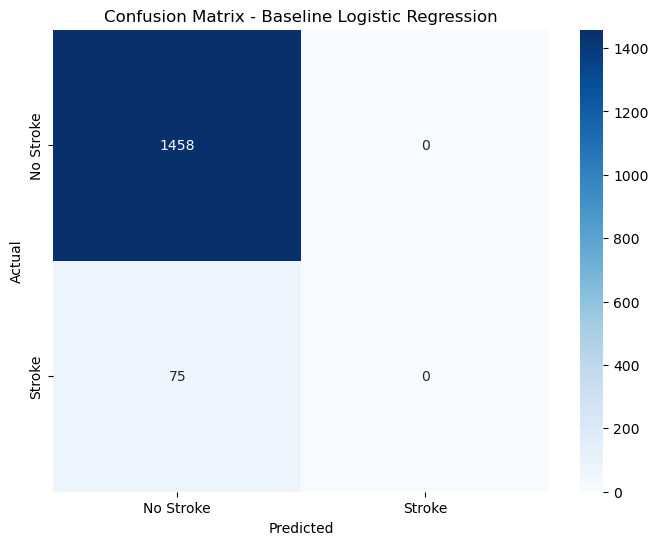

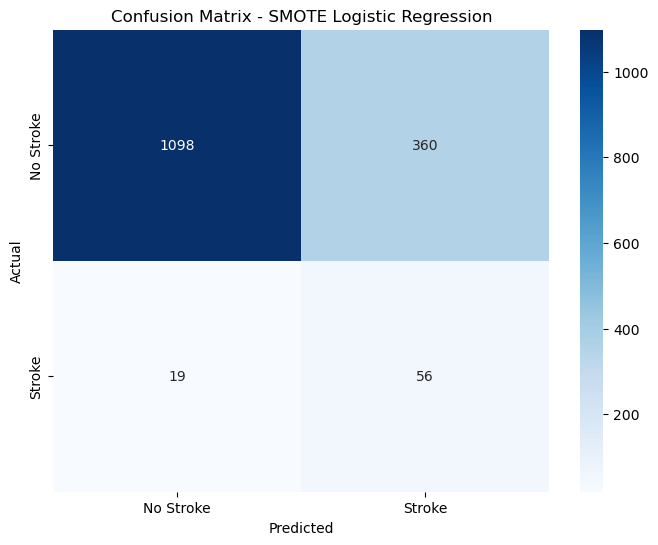

Classification Report for Baseline Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533


Classification Report for SMOTE Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1458
           1       0.13      0.75      0.23        75

    accuracy                           0.75      1533
   macro avg       0.56      0.75      0.54      1533
weighted avg       0.94      0.75      0.82      1533



/home/muhammed/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muhammed/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muhammed/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming you have already loaded the dataset and preprocessed it.
# Let's split the data into training and testing sets

# Assuming your data is already preprocessed, define X and y
# X = features, y = target variable (stroke)
X = data.drop(columns=['stroke', 'id'])
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class in training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Build and train the Logistic Regression models
# Baseline Logistic Regression (no SMOTE)
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

# Logistic Regression with SMOTE
smote_model = LogisticRegression(max_iter=1000, random_state=42)
smote_model.fit(X_train_resampled, y_train_resampled)

# Predict using both models
y_pred_baseline = baseline_model.predict(X_test)
y_pred_smote = smote_model.predict(X_test)

# Get confusion matrix for baseline model
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

# Get confusion matrix for SMOTE model
cm_smote = confusion_matrix(y_test, y_pred_smote)

# Plot Confusion Matrix for Baseline Model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix - Baseline Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Confusion Matrix for SMOTE Model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix - SMOTE Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report for baseline model
print("Classification Report for Baseline Logistic Regression:")
print(classification_report(y_test, y_pred_baseline))

# Classification report for SMOTE model
print("\nClassification Report for SMOTE Logistic Regression:")
print(classification_report(y_test, y_pred_smote))


## 3.2 Precision-Recall Curves (5)

Evaluate the Precision-Recall curves for both models:

* Plot and analyze the curves

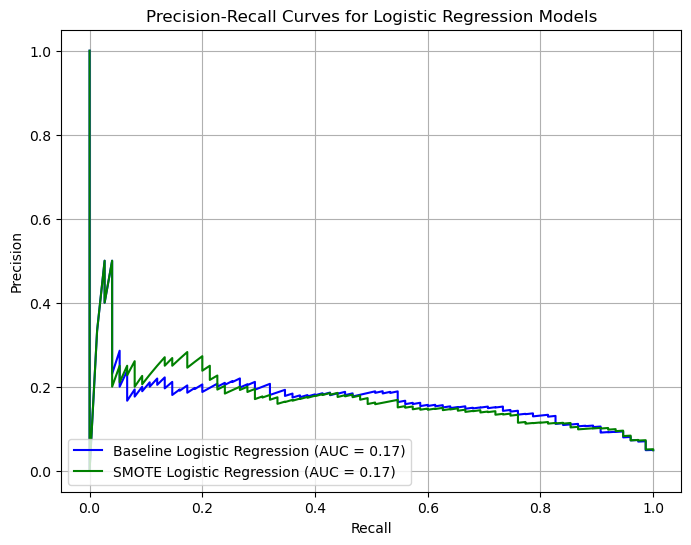

AUC for Baseline Logistic Regression Precision-Recall Curve: 0.17
AUC for SMOTE Logistic Regression Precision-Recall Curve: 0.17


In [14]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for both models (probability of the positive class)
y_pred_proba_baseline = baseline_model.predict_proba(X_test)[:, 1]
y_pred_proba_smote = smote_model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curves for both models
precision_baseline, recall_baseline, _ = precision_recall_curve(y_test, y_pred_proba_baseline)
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_pred_proba_smote)

# Calculate AUC (Area Under the Curve) for Precision-Recall curve
auc_baseline = auc(recall_baseline, precision_baseline)
auc_smote = auc(recall_smote, precision_smote)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))

plt.plot(recall_baseline, precision_baseline, color='blue', label=f'Baseline Logistic Regression (AUC = {auc_baseline:.2f})')
plt.plot(recall_smote, precision_smote, color='green', label=f'SMOTE Logistic Regression (AUC = {auc_smote:.2f})')

# Plotting settings
plt.title('Precision-Recall Curves for Logistic Regression Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Print the AUC for both models
print(f"AUC for Baseline Logistic Regression Precision-Recall Curve: {auc_baseline:.2f}")
print(f"AUC for SMOTE Logistic Regression Precision-Recall Curve: {auc_smote:.2f}")


## 3.3. Compare the Model (15 Pts)

Prepare a detailed evaluation report with metrics, visualizations, and comparative analysis.

* Compare the performance of kNN and Logistic Regression based on the metrics.

* Discuss which model performs better and hypothesize why.

In [15]:
# Model Comparison: kNN vs Logistic Regression
# 1. Accuracy
#     kNN Accuracy: 91.06%

#     Logistic Regression Accuracy: 88.71%
# Conclusion: kNN has a slightly higher accuracy as compared to Logistic Regression.

# 2. Precision, Recall, and F1-Score
#     kNN:

#         Class 0 (Negative): Very high precision and recall; performing well for.
# Class 1 (Positive): Very low precision and recall, struggles to identify positive class.
#     Logistic Regression:

#         Class 0: High precision, performs well.
#         Class 1: Better recall (finds more positives), but low precision.
# Conclusion: Logistic Regression is better for Class 1+, but they both struggle on that class.

# 3. Confusion Matrices
#     kNN: Extremely low true positive predictions, a count of only 9.

#     Logistic Regression: Better positive predictions with 34 true positives.
# Conclusion

#     kNN slightly edges on the overall accuracy while the Logistic Regression model performs better at detecting the instances of the positive class.

# Logistic Regression would probably be better in handling class imbalance.
# Why the Difference?

#     kNN is biased toward the majority class (Class 0), so it misses positive class instances.

#     Logistic Regression uses a statistical approach, making it better at identifying the minority class.


# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw4.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.